In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data

In [16]:
# read data
df_ice_cream = pd.read_csv('Sample Data/ice_cream.csv')

In [17]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [18]:
# rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [19]:
# convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [20]:
# set date as index
df_ice_cream.set_index('date', inplace=True)

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [23]:
# just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


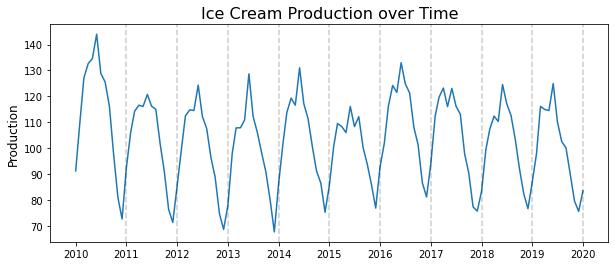

In [29]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=16)
plt.ylabel('Production', fontsize=12)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

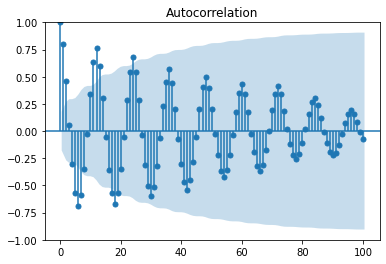

In [30]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

> Based on decaying ACF, we are likely dealing with an Auto Regressive process.

## PACF

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


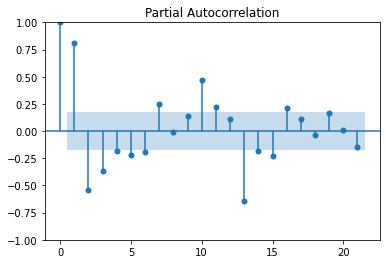

In [31]:
pacf_plot = plot_pacf(df_ice_cream.production)

> Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13.

# On stock data

In [36]:
# pip install yfinance

     |████████████████████████████████| 63 kB 4.2 MB/s eta 0:00:011
     |████████████████████████████████| 3.6 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 97.6 MB/s eta 0:00:01
  Created wheel for lxml: filename=lxml-4.9.3-cp39-cp39-macosx_10_9_x86_64.whl size=1700068 sha256=8ff16f2afede143ac400dd636e40838756ccf2bd4ad0963ef9364c5e92d37fe5
  Stored in directory: /Users/Yunhee/Library/Caches/pip/wheels/5c/05/aa/530f84480d476c5bb9ea09877eea78fb144ec047fbb00ee2ca
Successfully built lxml
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [37]:
import yfinance as yf

In [40]:
# define the ticker symbol
tickerSymbol = 'SPY'

In [41]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [42]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [44]:
tickerDf = tickerDf[['Close']]
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.134628
2015-01-05 00:00:00-05:00,172.953659
2015-01-06 00:00:00-05:00,171.324646
2015-01-07 00:00:00-05:00,173.459564
2015-01-08 00:00:00-05:00,176.537613


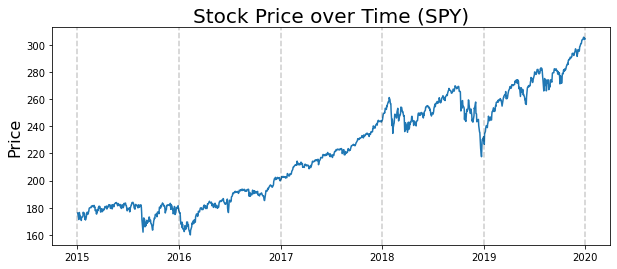

In [45]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity : take first difference of this series

In [46]:
#take first difference
# tickerDf.Close.values[1:] : stock price tomorrowb
# tickerDf.Close.values[:-1] : stock price today
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [65]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,176.134628,-3.180969
2015-01-05 00:00:00-05:00,172.953659,-1.629013
2015-01-06 00:00:00-05:00,171.324646,2.134918
2015-01-07 00:00:00-05:00,173.459564,3.078049
2015-01-08 00:00:00-05:00,176.537613,-1.414719


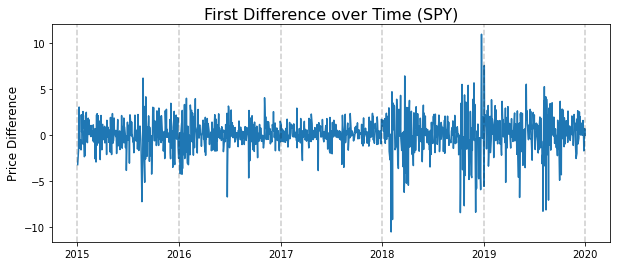

In [66]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=16)
plt.ylabel('Price Difference', fontsize=12)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

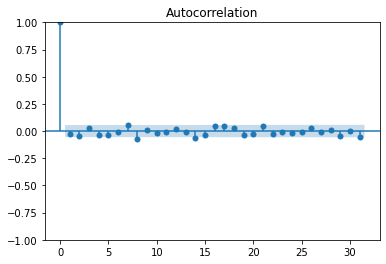

In [67]:
acf_plot = plot_acf(tickerDf.FirstDifference)

## PACF

/Users/Yunhee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


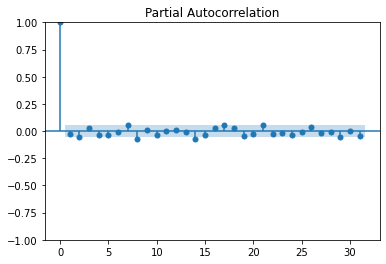

In [68]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

> ACF and PACF do not tell us much.